In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']


In [8]:
x =np.array(x)
y=np.array(y).reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [11]:
from sklearn.linear_model import Ridge

In [12]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-3,3,7)
ridge_cv = RidgeCV(alphas=alphas,cv=10)
ridge_cv.fit(x_train,y_train)
print("Best alpha:",ridge_cv.alpha_)

Best alpha: 10.0


In [13]:
best_ridge = Ridge(alpha=ridge_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_pred = best_ridge.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
mse = mean_squared_error(y_test,y_pred)
rmse =np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)

Mean Squared Error: 24.4958456196674
Root Mean Squared Error: 4.949327794728028
R-squared: 0.6659677905050341


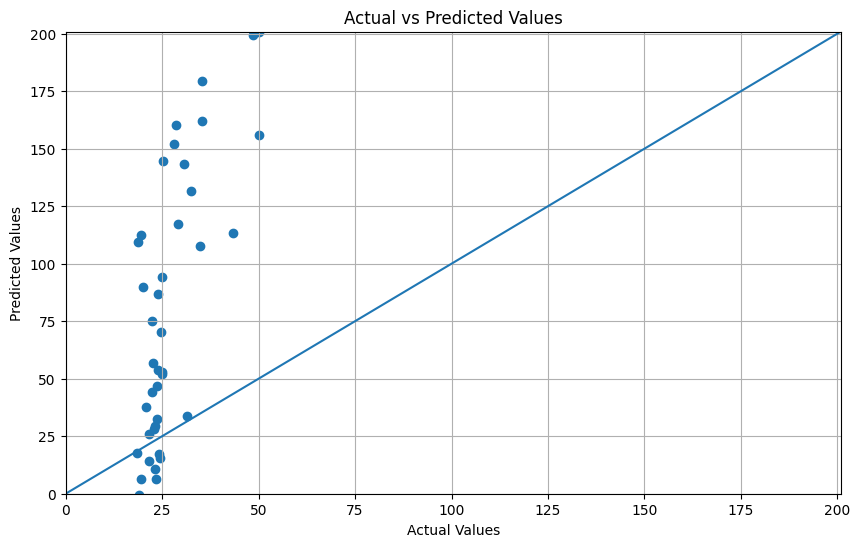

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
max_val=max(y_test.max(),y_pred.max())
plt.plot([0,max_val],[0,max_val],)
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid()
plt.show()